In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: SAP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


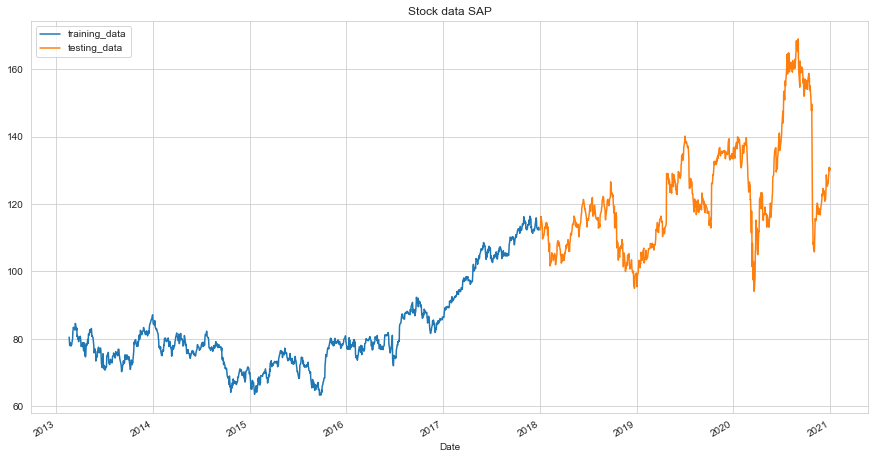

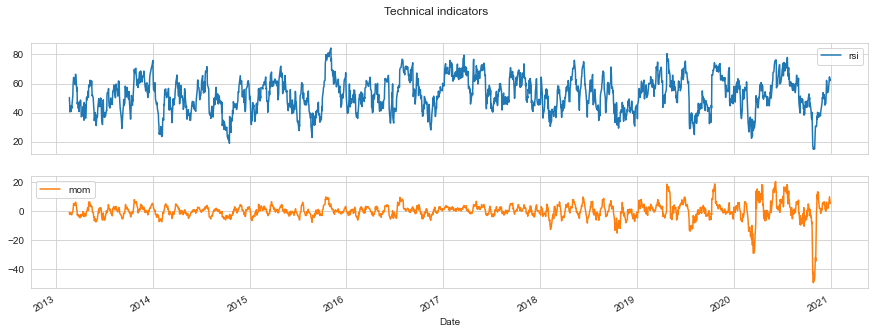

In [2]:
stock_name = 'sap'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1189.65, duration: 0:00:00.285474
episode: 2/2000, episode end value: 1201.08, duration: 0:00:00.271401
episode: 3/2000, episode end value: 1231.22, duration: 0:00:00.319414
episode: 4/2000, episode end value: 1215.87, duration: 0:00:00.350260
episode: 5/2000, episode end value: 1228.76, duration: 0:00:00.336618
episode: 6/2000, episode end value: 1185.39, duration: 0:00:00.465925
episode: 7/2000, episode end value: 1216.99, duration: 0:00:00.374235
episode: 8/2000, episode end value: 1227.25, duration: 0:00:00.323773
episode: 9/2000, episode end value: 1208.28, duration: 0:00:00.362095
episode: 10/2000, episode end value: 1207.70, duration: 0:00:00.362594
episode: 11/2000, episode end value: 1224.04, duration: 0:00:00.347431
episode: 12/2000, episode end value: 1204.84, duration: 0:00:00.452385
episode: 13/2000, episode end value: 1230.60, duration: 0:00:00.438246
episode: 14/2000, episode end value: 1193.89, duration: 0:00:00.431017
episode: 15/200

episode: 117/2000, episode end value: 1155.39, duration: 0:00:00.279100
episode: 118/2000, episode end value: 1187.68, duration: 0:00:00.390285
episode: 119/2000, episode end value: 1190.73, duration: 0:00:00.384498
episode: 120/2000, episode end value: 1178.55, duration: 0:00:00.378816
episode: 121/2000, episode end value: 1177.58, duration: 0:00:00.379575
episode: 122/2000, episode end value: 1177.13, duration: 0:00:00.326157
episode: 123/2000, episode end value: 1208.33, duration: 0:00:00.337052
episode: 124/2000, episode end value: 1209.95, duration: 0:00:00.374499
episode: 125/2000, episode end value: 1210.62, duration: 0:00:00.392417
episode: 126/2000, episode end value: 1195.33, duration: 0:00:00.367096
episode: 127/2000, episode end value: 1185.19, duration: 0:00:00.360322
episode: 128/2000, episode end value: 1175.94, duration: 0:00:00.322771
episode: 129/2000, episode end value: 1191.85, duration: 0:00:00.400468
episode: 130/2000, episode end value: 1177.54, duration: 0:00:00

episode: 231/2000, episode end value: 1213.61, duration: 0:00:00.444593
episode: 232/2000, episode end value: 1197.08, duration: 0:00:00.405419
episode: 233/2000, episode end value: 1219.97, duration: 0:00:00.419731
episode: 234/2000, episode end value: 1176.63, duration: 0:00:00.435483
episode: 235/2000, episode end value: 1202.13, duration: 0:00:00.378732
episode: 236/2000, episode end value: 1201.96, duration: 0:00:00.390623
episode: 237/2000, episode end value: 1213.27, duration: 0:00:00.505433
episode: 238/2000, episode end value: 1210.61, duration: 0:00:00.405021
episode: 239/2000, episode end value: 1208.46, duration: 0:00:00.389229
episode: 240/2000, episode end value: 1199.92, duration: 0:00:00.439100
episode: 241/2000, episode end value: 1181.76, duration: 0:00:00.352828
episode: 242/2000, episode end value: 1194.58, duration: 0:00:00.354843
episode: 243/2000, episode end value: 1224.94, duration: 0:00:00.468235
episode: 244/2000, episode end value: 1235.44, duration: 0:00:00

episode: 345/2000, episode end value: 1151.87, duration: 0:00:00.441749
episode: 346/2000, episode end value: 1169.53, duration: 0:00:00.429043
episode: 347/2000, episode end value: 1166.66, duration: 0:00:00.310028
episode: 348/2000, episode end value: 1166.76, duration: 0:00:00.304808
episode: 349/2000, episode end value: 1169.52, duration: 0:00:00.365837
episode: 350/2000, episode end value: 1155.67, duration: 0:00:00.452004
episode: 351/2000, episode end value: 1171.52, duration: 0:00:00.487378
episode: 352/2000, episode end value: 1157.79, duration: 0:00:00.430466
episode: 353/2000, episode end value: 1155.31, duration: 0:00:00.352143
episode: 354/2000, episode end value: 1167.73, duration: 0:00:00.363737
episode: 355/2000, episode end value: 1162.52, duration: 0:00:00.342608
episode: 356/2000, episode end value: 1153.70, duration: 0:00:00.310530
episode: 357/2000, episode end value: 1157.91, duration: 0:00:00.344713
episode: 358/2000, episode end value: 1160.76, duration: 0:00:00

episode: 459/2000, episode end value: 1189.08, duration: 0:00:00.493500
episode: 460/2000, episode end value: 1161.40, duration: 0:00:00.396439
episode: 461/2000, episode end value: 1166.28, duration: 0:00:00.350323
episode: 462/2000, episode end value: 1157.17, duration: 0:00:00.359836
episode: 463/2000, episode end value: 1157.65, duration: 0:00:00.414812
episode: 464/2000, episode end value: 1162.30, duration: 0:00:00.383759
episode: 465/2000, episode end value: 1154.56, duration: 0:00:00.371712
episode: 466/2000, episode end value: 1170.72, duration: 0:00:00.363011
episode: 467/2000, episode end value: 1162.71, duration: 0:00:00.370031
episode: 468/2000, episode end value: 1162.72, duration: 0:00:00.440245
episode: 469/2000, episode end value: 1155.74, duration: 0:00:00.393495
episode: 470/2000, episode end value: 1151.10, duration: 0:00:00.409121
episode: 471/2000, episode end value: 1158.72, duration: 0:00:00.338281
episode: 472/2000, episode end value: 1156.15, duration: 0:00:00

episode: 573/2000, episode end value: 1160.27, duration: 0:00:00.390368
episode: 574/2000, episode end value: 1170.20, duration: 0:00:00.402537
episode: 575/2000, episode end value: 1213.87, duration: 0:00:00.300192
episode: 576/2000, episode end value: 1162.76, duration: 0:00:00.394803
episode: 577/2000, episode end value: 1177.03, duration: 0:00:00.433857
episode: 578/2000, episode end value: 1151.25, duration: 0:00:00.390926
episode: 579/2000, episode end value: 1160.91, duration: 0:00:00.442323
episode: 580/2000, episode end value: 1187.32, duration: 0:00:00.427043
episode: 581/2000, episode end value: 1177.12, duration: 0:00:00.437006
episode: 582/2000, episode end value: 1163.55, duration: 0:00:00.472020
episode: 583/2000, episode end value: 1182.46, duration: 0:00:00.497067
episode: 584/2000, episode end value: 1188.68, duration: 0:00:00.408393
episode: 585/2000, episode end value: 1186.47, duration: 0:00:00.398626
episode: 586/2000, episode end value: 1219.90, duration: 0:00:00

episode: 687/2000, episode end value: 1157.96, duration: 0:00:00.377793
episode: 688/2000, episode end value: 1152.26, duration: 0:00:00.331130
episode: 689/2000, episode end value: 1148.78, duration: 0:00:00.353490
episode: 690/2000, episode end value: 1148.25, duration: 0:00:00.397356
episode: 691/2000, episode end value: 1157.24, duration: 0:00:00.343113
episode: 692/2000, episode end value: 1151.34, duration: 0:00:00.372385
episode: 693/2000, episode end value: 1159.57, duration: 0:00:00.424692
episode: 694/2000, episode end value: 1162.55, duration: 0:00:00.438190
episode: 695/2000, episode end value: 1160.07, duration: 0:00:00.485907
episode: 696/2000, episode end value: 1156.23, duration: 0:00:00.465733
episode: 697/2000, episode end value: 1190.08, duration: 0:00:00.457235
episode: 698/2000, episode end value: 1181.94, duration: 0:00:00.414264
episode: 699/2000, episode end value: 1192.33, duration: 0:00:00.524238
episode: 700/2000, episode end value: 1218.18, duration: 0:00:00

episode: 801/2000, episode end value: 1158.12, duration: 0:00:00.416286
episode: 802/2000, episode end value: 1160.03, duration: 0:00:00.509632
episode: 803/2000, episode end value: 1143.75, duration: 0:00:00.427362
episode: 804/2000, episode end value: 1142.65, duration: 0:00:00.351246
episode: 805/2000, episode end value: 1139.00, duration: 0:00:00.321535
episode: 806/2000, episode end value: 1133.50, duration: 0:00:00.362625
episode: 807/2000, episode end value: 1144.09, duration: 0:00:00.336023
episode: 808/2000, episode end value: 1124.41, duration: 0:00:00.378459
episode: 809/2000, episode end value: 1170.92, duration: 0:00:00.417729
episode: 810/2000, episode end value: 1194.42, duration: 0:00:00.407228
episode: 811/2000, episode end value: 1174.41, duration: 0:00:00.393497
episode: 812/2000, episode end value: 1194.95, duration: 0:00:00.455638
episode: 813/2000, episode end value: 1164.79, duration: 0:00:00.398877
episode: 814/2000, episode end value: 1192.77, duration: 0:00:00

episode: 915/2000, episode end value: 1170.15, duration: 0:00:00.365409
episode: 916/2000, episode end value: 1172.78, duration: 0:00:00.399478
episode: 917/2000, episode end value: 1176.46, duration: 0:00:00.443117
episode: 918/2000, episode end value: 1194.19, duration: 0:00:00.560437
episode: 919/2000, episode end value: 1190.89, duration: 0:00:00.421150
episode: 920/2000, episode end value: 1169.08, duration: 0:00:00.361957
episode: 921/2000, episode end value: 1177.96, duration: 0:00:00.430966
episode: 922/2000, episode end value: 1180.33, duration: 0:00:00.393527
episode: 923/2000, episode end value: 1196.33, duration: 0:00:00.427007
episode: 924/2000, episode end value: 1191.50, duration: 0:00:00.464878
episode: 925/2000, episode end value: 1188.86, duration: 0:00:00.490751
episode: 926/2000, episode end value: 1187.08, duration: 0:00:00.539720
episode: 927/2000, episode end value: 1169.86, duration: 0:00:00.417508
episode: 928/2000, episode end value: 1182.95, duration: 0:00:00

episode: 1029/2000, episode end value: 1130.29, duration: 0:00:00.362562
episode: 1030/2000, episode end value: 1121.71, duration: 0:00:00.353203
episode: 1031/2000, episode end value: 1133.26, duration: 0:00:00.376780
episode: 1032/2000, episode end value: 1123.68, duration: 0:00:00.405977
episode: 1033/2000, episode end value: 1113.61, duration: 0:00:00.346570
episode: 1034/2000, episode end value: 1127.16, duration: 0:00:00.458886
episode: 1035/2000, episode end value: 1162.74, duration: 0:00:00.385941
episode: 1036/2000, episode end value: 1165.39, duration: 0:00:00.404765
episode: 1037/2000, episode end value: 1144.79, duration: 0:00:00.455185
episode: 1038/2000, episode end value: 1148.31, duration: 0:00:00.478396
episode: 1039/2000, episode end value: 1142.36, duration: 0:00:00.450959
episode: 1040/2000, episode end value: 1142.95, duration: 0:00:00.363740
episode: 1041/2000, episode end value: 1139.78, duration: 0:00:00.433255
episode: 1042/2000, episode end value: 1142.77, dur

episode: 1142/2000, episode end value: 1155.48, duration: 0:00:00.411285
episode: 1143/2000, episode end value: 1176.85, duration: 0:00:00.419558
episode: 1144/2000, episode end value: 1173.42, duration: 0:00:00.436371
episode: 1145/2000, episode end value: 1183.60, duration: 0:00:00.327194
episode: 1146/2000, episode end value: 1134.52, duration: 0:00:00.344392
episode: 1147/2000, episode end value: 1138.24, duration: 0:00:00.397655
episode: 1148/2000, episode end value: 1140.36, duration: 0:00:00.439650
episode: 1149/2000, episode end value: 1166.15, duration: 0:00:00.393585
episode: 1150/2000, episode end value: 1176.37, duration: 0:00:00.476472
episode: 1151/2000, episode end value: 1164.15, duration: 0:00:00.411768
episode: 1152/2000, episode end value: 1171.62, duration: 0:00:00.429839
episode: 1153/2000, episode end value: 1170.70, duration: 0:00:00.528024
episode: 1154/2000, episode end value: 1135.56, duration: 0:00:00.404757
episode: 1155/2000, episode end value: 1156.22, dur

episode: 1255/2000, episode end value: 1179.47, duration: 0:00:00.341629
episode: 1256/2000, episode end value: 1161.96, duration: 0:00:00.354470
episode: 1257/2000, episode end value: 1169.91, duration: 0:00:00.473937
episode: 1258/2000, episode end value: 1164.69, duration: 0:00:00.469219
episode: 1259/2000, episode end value: 1120.02, duration: 0:00:00.353292
episode: 1260/2000, episode end value: 1142.85, duration: 0:00:00.348093
episode: 1261/2000, episode end value: 1119.02, duration: 0:00:00.320319
episode: 1262/2000, episode end value: 1127.73, duration: 0:00:00.318033
episode: 1263/2000, episode end value: 1146.58, duration: 0:00:00.401696
episode: 1264/2000, episode end value: 1164.52, duration: 0:00:00.326739
episode: 1265/2000, episode end value: 1190.20, duration: 0:00:00.420720
episode: 1266/2000, episode end value: 1153.48, duration: 0:00:00.376793
episode: 1267/2000, episode end value: 1177.21, duration: 0:00:00.351317
episode: 1268/2000, episode end value: 1172.07, dur

episode: 1368/2000, episode end value: 1170.52, duration: 0:00:00.461526
episode: 1369/2000, episode end value: 1191.87, duration: 0:00:00.409598
episode: 1370/2000, episode end value: 1154.85, duration: 0:00:00.425805
episode: 1371/2000, episode end value: 1187.09, duration: 0:00:00.446450
episode: 1372/2000, episode end value: 1176.21, duration: 0:00:00.386044
episode: 1373/2000, episode end value: 1188.88, duration: 0:00:00.404666
episode: 1374/2000, episode end value: 1188.52, duration: 0:00:00.464448
episode: 1375/2000, episode end value: 1193.87, duration: 0:00:00.400367
episode: 1376/2000, episode end value: 1192.71, duration: 0:00:00.429811
episode: 1377/2000, episode end value: 1181.38, duration: 0:00:00.352311
episode: 1378/2000, episode end value: 1183.02, duration: 0:00:00.422926
episode: 1379/2000, episode end value: 1192.95, duration: 0:00:00.479244
episode: 1380/2000, episode end value: 1192.47, duration: 0:00:00.452061
episode: 1381/2000, episode end value: 1180.50, dur

episode: 1481/2000, episode end value: 1184.64, duration: 0:00:00.533784
episode: 1482/2000, episode end value: 1179.47, duration: 0:00:00.450817
episode: 1483/2000, episode end value: 1189.24, duration: 0:00:00.511357
episode: 1484/2000, episode end value: 1183.87, duration: 0:00:00.402780
episode: 1485/2000, episode end value: 1182.89, duration: 0:00:00.388132
episode: 1486/2000, episode end value: 1191.05, duration: 0:00:00.493122
episode: 1487/2000, episode end value: 1187.70, duration: 0:00:00.460675
episode: 1488/2000, episode end value: 1184.96, duration: 0:00:00.423685
episode: 1489/2000, episode end value: 1188.15, duration: 0:00:00.440627
episode: 1490/2000, episode end value: 1174.13, duration: 0:00:00.377766
episode: 1491/2000, episode end value: 1176.36, duration: 0:00:00.377515
episode: 1492/2000, episode end value: 1181.25, duration: 0:00:00.419822
episode: 1493/2000, episode end value: 1151.45, duration: 0:00:00.415010
episode: 1494/2000, episode end value: 1178.80, dur

episode: 1594/2000, episode end value: 1194.42, duration: 0:00:00.372080
episode: 1595/2000, episode end value: 1193.72, duration: 0:00:00.513713
episode: 1596/2000, episode end value: 1192.17, duration: 0:00:00.406029
episode: 1597/2000, episode end value: 1190.87, duration: 0:00:00.539746
episode: 1598/2000, episode end value: 1186.70, duration: 0:00:00.454327
episode: 1599/2000, episode end value: 1189.82, duration: 0:00:00.470017
episode: 1600/2000, episode end value: 1194.97, duration: 0:00:00.438478
episode: 1601/2000, episode end value: 1193.99, duration: 0:00:00.453408
episode: 1602/2000, episode end value: 1192.85, duration: 0:00:00.472081
episode: 1603/2000, episode end value: 1195.50, duration: 0:00:00.504194
episode: 1604/2000, episode end value: 1195.25, duration: 0:00:00.470806
episode: 1605/2000, episode end value: 1192.12, duration: 0:00:00.529146
episode: 1606/2000, episode end value: 1191.92, duration: 0:00:00.459799
episode: 1607/2000, episode end value: 1193.71, dur

episode: 1707/2000, episode end value: 1205.80, duration: 0:00:00.438669
episode: 1708/2000, episode end value: 1191.22, duration: 0:00:00.431627
episode: 1709/2000, episode end value: 1212.66, duration: 0:00:00.364237
episode: 1710/2000, episode end value: 1195.72, duration: 0:00:00.399001
episode: 1711/2000, episode end value: 1177.84, duration: 0:00:00.449217
episode: 1712/2000, episode end value: 1190.38, duration: 0:00:00.473942
episode: 1713/2000, episode end value: 1192.41, duration: 0:00:00.537397
episode: 1714/2000, episode end value: 1193.21, duration: 0:00:00.508744
episode: 1715/2000, episode end value: 1193.52, duration: 0:00:00.462151
episode: 1716/2000, episode end value: 1194.83, duration: 0:00:00.455286
episode: 1717/2000, episode end value: 1195.27, duration: 0:00:00.444728
episode: 1718/2000, episode end value: 1193.94, duration: 0:00:00.369753
episode: 1719/2000, episode end value: 1189.15, duration: 0:00:00.406208
episode: 1720/2000, episode end value: 1192.12, dur

episode: 1820/2000, episode end value: 1193.65, duration: 0:00:00.293918
episode: 1821/2000, episode end value: 1205.80, duration: 0:00:00.261119
episode: 1822/2000, episode end value: 1182.67, duration: 0:00:00.310702
episode: 1823/2000, episode end value: 1168.10, duration: 0:00:00.303117
episode: 1824/2000, episode end value: 1176.85, duration: 0:00:00.284430
episode: 1825/2000, episode end value: 1182.18, duration: 0:00:00.303454
episode: 1826/2000, episode end value: 1157.14, duration: 0:00:00.295843
episode: 1827/2000, episode end value: 1180.55, duration: 0:00:00.296097
episode: 1828/2000, episode end value: 1188.88, duration: 0:00:00.291926
episode: 1829/2000, episode end value: 1189.22, duration: 0:00:00.282858
episode: 1830/2000, episode end value: 1159.26, duration: 0:00:00.281743
episode: 1831/2000, episode end value: 1191.11, duration: 0:00:00.294415
episode: 1832/2000, episode end value: 1190.23, duration: 0:00:00.296158
episode: 1833/2000, episode end value: 1189.15, dur

episode: 1933/2000, episode end value: 1147.76, duration: 0:00:00.247612
episode: 1934/2000, episode end value: 1144.33, duration: 0:00:00.252691
episode: 1935/2000, episode end value: 1142.98, duration: 0:00:00.228790
episode: 1936/2000, episode end value: 1146.57, duration: 0:00:00.251892
episode: 1937/2000, episode end value: 1150.79, duration: 0:00:00.245559
episode: 1938/2000, episode end value: 1148.39, duration: 0:00:00.244619
episode: 1939/2000, episode end value: 1149.84, duration: 0:00:00.246747
episode: 1940/2000, episode end value: 1147.38, duration: 0:00:00.238799
episode: 1941/2000, episode end value: 1148.38, duration: 0:00:00.240514
episode: 1942/2000, episode end value: 1145.14, duration: 0:00:00.246623
episode: 1943/2000, episode end value: 1140.67, duration: 0:00:00.233139
episode: 1944/2000, episode end value: 1142.73, duration: 0:00:00.222911
episode: 1945/2000, episode end value: 1144.56, duration: 0:00:00.236974
episode: 1946/2000, episode end value: 1146.97, dur

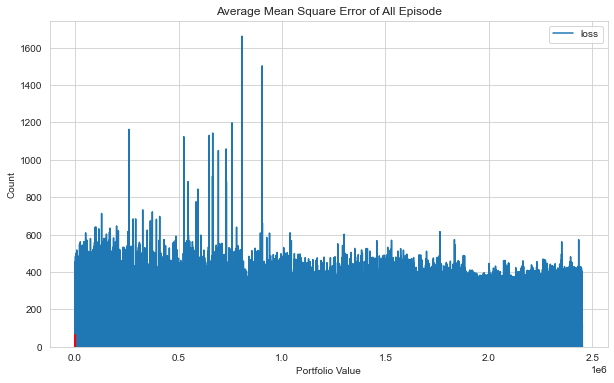

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

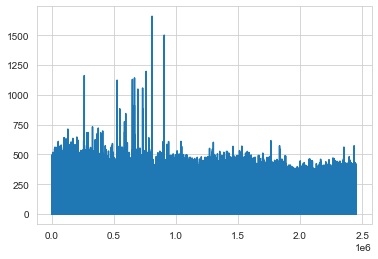

In [5]:
plt.plot(agent.model.losses)

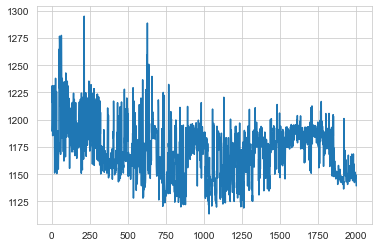

In [6]:
plt.plot(portfolio_value)

episode end value: 1207.81, duration: 0:00:00.093753
Sell: 401 times, Buy: 328 times


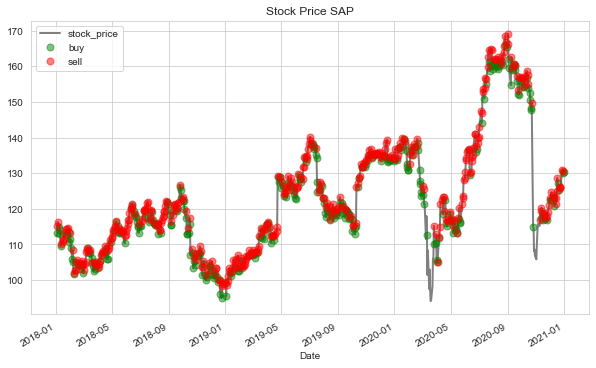

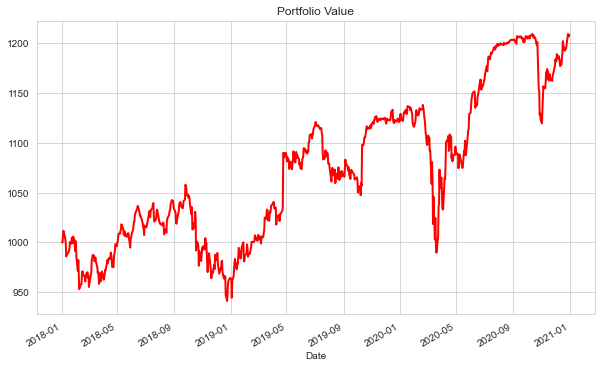

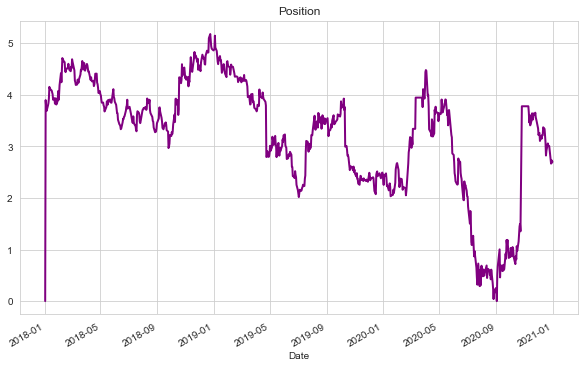

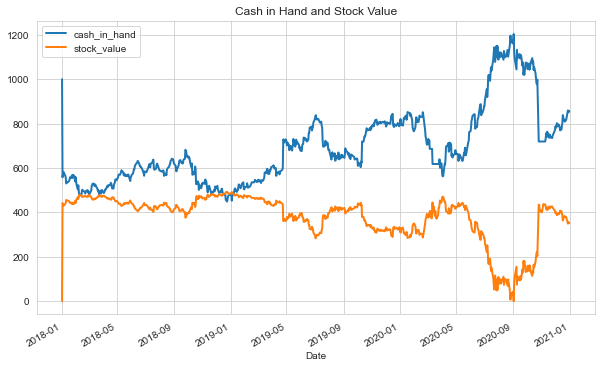

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SAP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.50 %
Volatility: 0.1170
shape ratio: 0.4610
Maximun drawdown: -13.04 %
Calmar ratio: 0.4981
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.08 %
Volatility (benchmark): 0.3274
shape ratio: 0.1214
Maximun drawdown: -37.39 %
Calmar ratio (benchmark): 0.1358


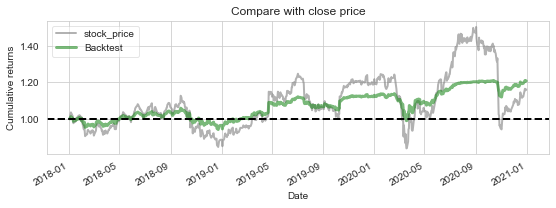

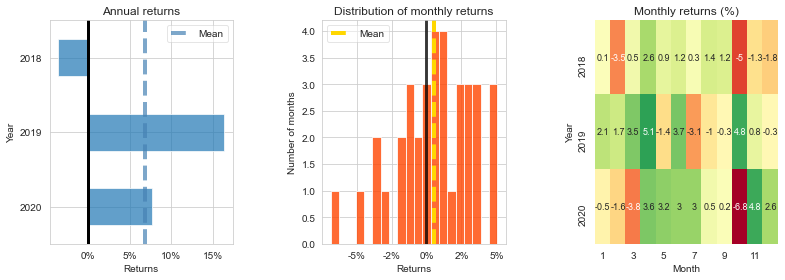

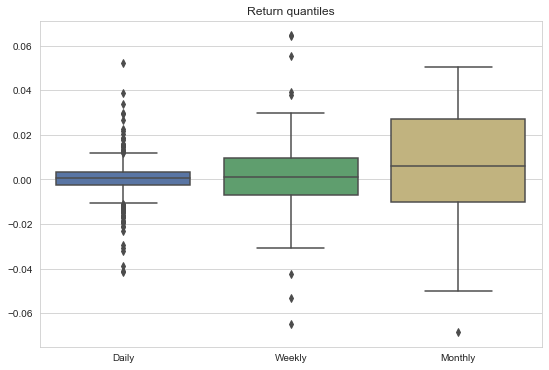

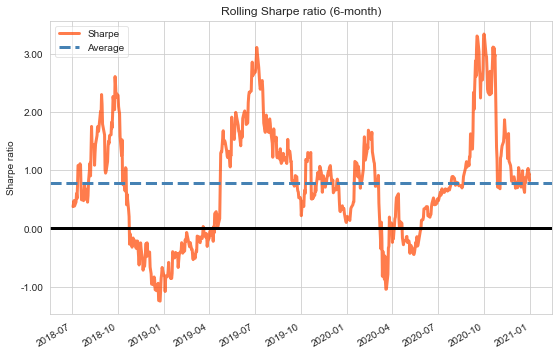

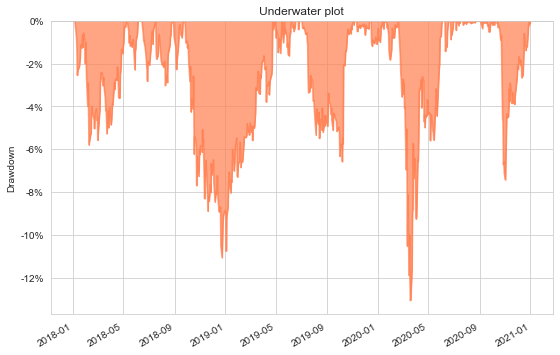

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')